# Introduction

One of the most common questions among fitness enthusiasts and researchers is whether training more frequently results in greater calorie burn per workout session. This question has implications for optimizing workout plans and tailoring fitness routines to maximize efficiency and outcomes.

## Research Question
**Is weekly workout frequency associated with a higher amount of calories burned per session?**  
In other words, does training more often lead to better calorie burn per session?

## Plan
To answer this question, the analysis will follow these steps:
1. **Data Preparation**:
   - Load and preprocess the dataset to focus on relevant variables: `Workout_Frequency` and `Calories_Burned`.
   - Check for missing values, outliers, and ensure the data is clean for analysis.

2. **Exploratory Data Analysis (EDA)**:
   - Visualize the relationship between workout frequency and calories burned using scatter plots and box plots.
   - Compare the distributions of calories burned across different workout frequencies.

3. **Correlation Analysis**:
   - Calculate the Pearson correlation coefficient to assess the strength and direction of the relationship between workout frequency and calorie burn.

4. **Statistical Modeling**:
   - Perform a linear regression analysis to determine whether workout frequency is a significant predictor of calories burned per session.
   - Quantify the impact of workout frequency on calorie burn.

5. **Conclusion**:
   - Summarize the findings and provide a data-driven answer to the research question.


# Import

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from plotnine import *
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Data Preparation

In [2]:
# Load the dataset
path = "../data/gym_members_exercise_tracking.csv"
df_gym = pd.read_csv(path)

In [3]:
# Display the first few rows to understand the dataset structure
display(df_gym.head())

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
# Focus on relevant columns for analysis
df_analysis = df_gym[['Workout_Frequency (days/week)', 'Calories_Burned']].copy()

In [5]:
# Rename the column for compatibility with the regression formula
df_analysis = df_analysis.rename(columns={"Workout_Frequency (days/week)": "Workout_Frequency"})

In [6]:
# Check for missing values
print("Missing values in the selected columns:")
print(df_analysis.isnull().sum())

Missing values in the selected columns:
Workout_Frequency    0
Calories_Burned      0
dtype: int64


In [7]:
# Check summary statistics for the selected columns
print("Summary statistics for the selected columns:")
display(df_analysis.describe())

Summary statistics for the selected columns:


,Workout_Frequency,Calories_Burned
count,973.000000,973.000000
mean,3.321686,905.422405
std,0.913047,272.641516
min,2.000000,303.000000
25%,3.000000,720.000000
50%,3.000000,893.000000
75%,4.000000,1076.000000
max,5.000000,1783.000000


In [10]:
# Check the unique values in Workout_Frequency
print("Unique values in Workout_Frequency:")
print(df_analysis['Workout_Frequency'].unique())

Unique values in Workout_Frequency:
[4 3 5 2]


# Exploratory Data Analysis (EDA)

C:\Users\raiss\AppData\Local\Temp\ipykernel_15072\1922049712.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


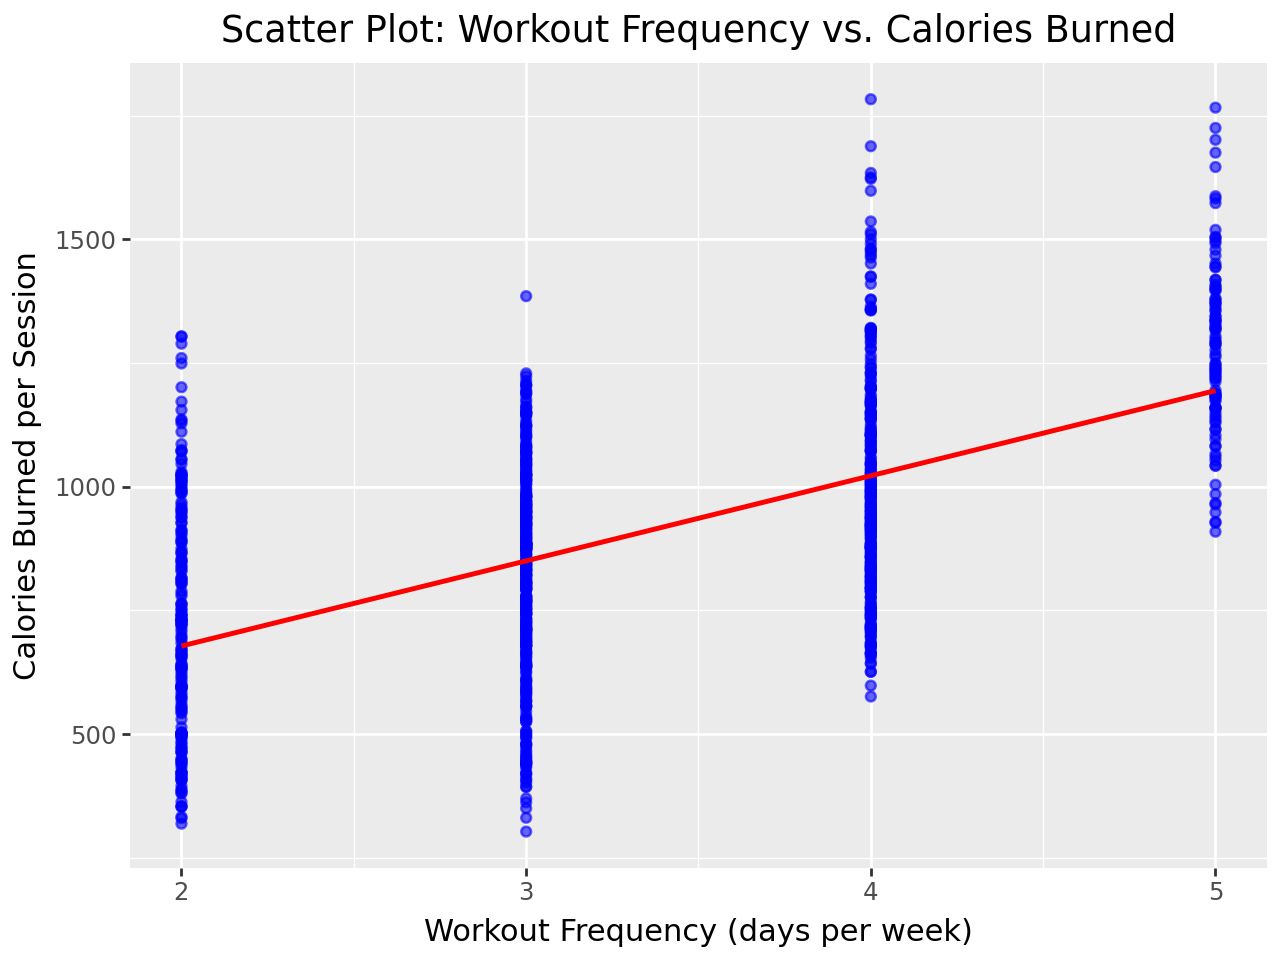

In [11]:
scatter_plot = (
    ggplot(df_analysis, aes(x='Workout_Frequency', y='Calories_Burned'))
    + geom_point(alpha=0.6, color="blue")
    + geom_smooth(method='lm', se=False, color='red')
    + labs(
        title="Scatter Plot: Workout Frequency vs. Calories Burned",
        x="Workout Frequency (days per week)",
        y="Calories Burned per Session"
    )
)
print(scatter_plot)


C:\Users\raiss\AppData\Local\Temp\ipykernel_15072\3859739022.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


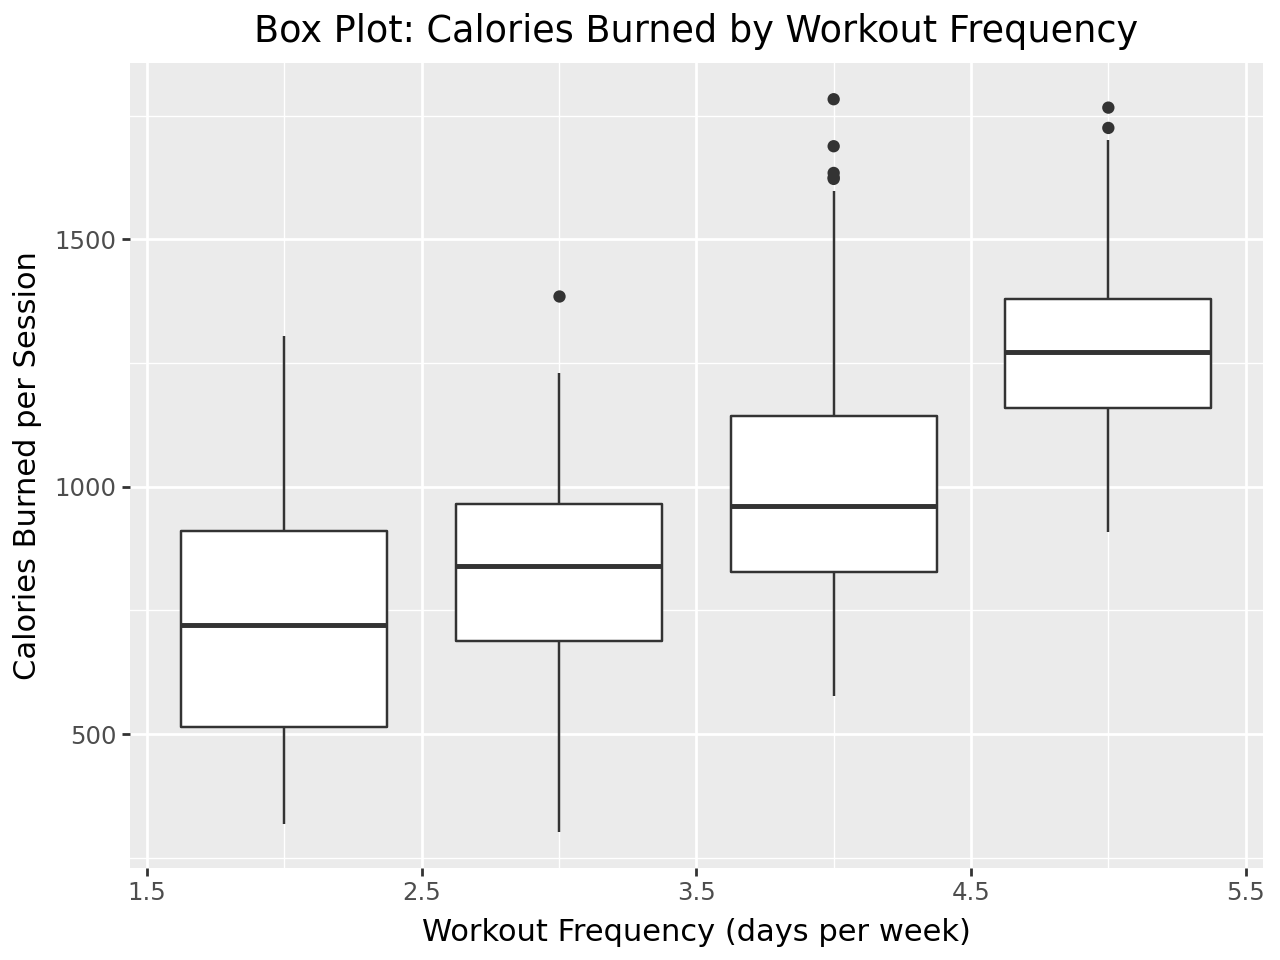

In [15]:
# Box Plot: Distribution of Calories Burned by Workout Frequency
box_plot = (
    ggplot(df_analysis, aes(x='Workout_Frequency', y='Calories_Burned', group='Workout_Frequency'))
    + geom_boxplot()
    + labs(
        title="Box Plot: Calories Burned by Workout Frequency",
        x="Workout Frequency (days per week)",
        y="Calories Burned per Session"
    )
)
print(box_plot)

C:\Users\raiss\AppData\Local\Temp\ipykernel_15072\951659525.py:10: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


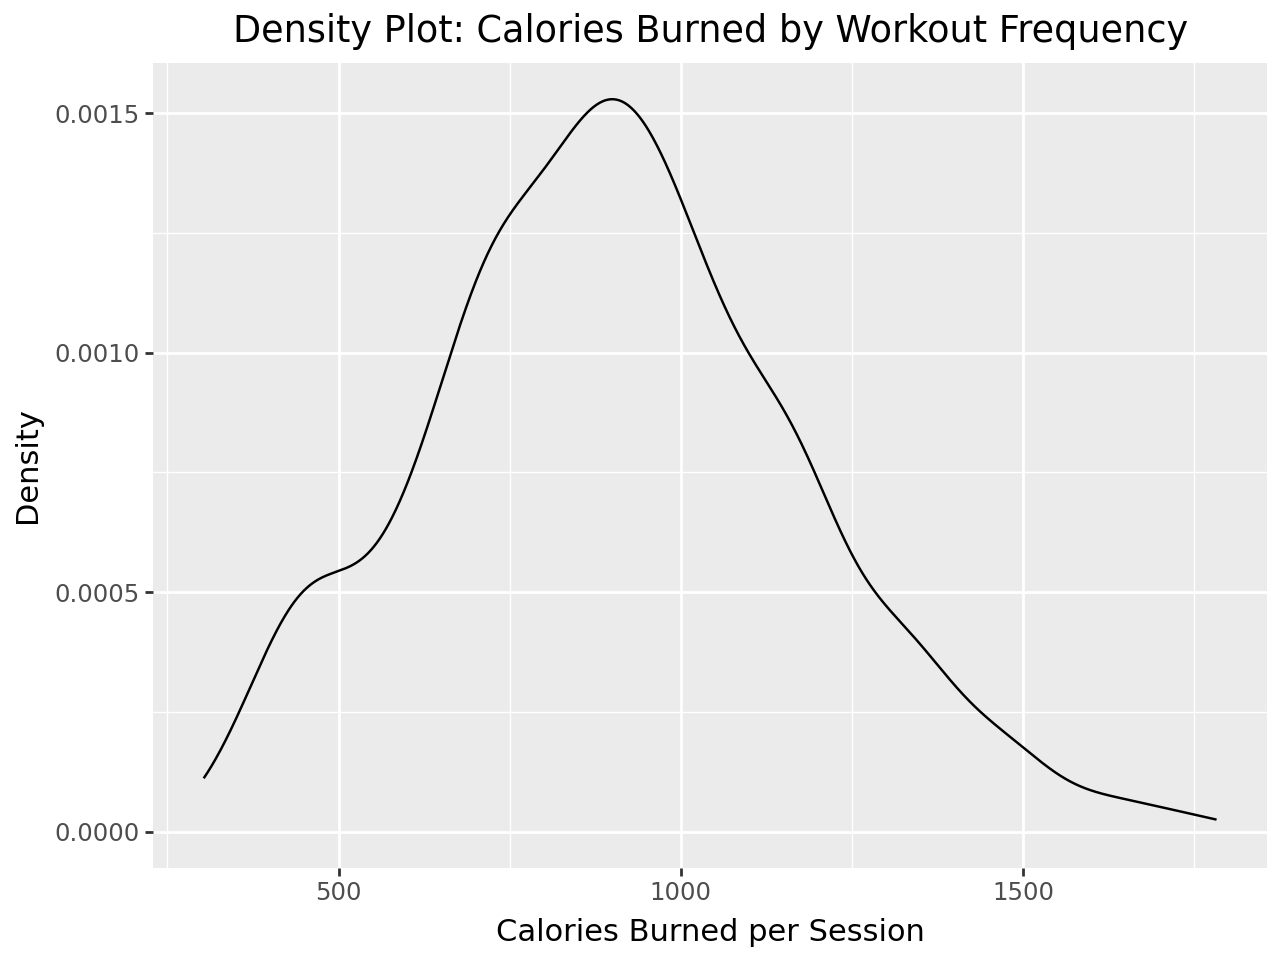

In [18]:
density_plot = (
    ggplot(df_analysis, aes(x='Calories_Burned', fill='Workout_Frequency'))
    + geom_density(alpha=0.5)
    + labs(
        title="Density Plot: Calories Burned by Workout Frequency",
        x="Calories Burned per Session",
        y="Density"
    )
)
print(density_plot)


In [20]:
# Summary Statistics by Workout Frequency
print("Summary statistics by Workout Frequency:")
summary_stats = df_analysis.groupby('Workout_Frequency')['Calories_Burned'].describe()
display(summary_stats)

Summary statistics by Workout Frequency:


,count,mean,std,min,25%,50%,75%,max
Workout_Frequency,,,,,,,,
2,197.0,726.380711,237.349914,319.0,514.0,720.0,911.00,1304.0
3,368.0,821.437500,207.766785,303.0,687.5,839.5,964.25,1385.0
4,306.0,997.640523,231.606127,576.0,827.0,960.0,1143.75,1783.0
5,102.0,1277.568627,182.616761,909.0,1159.0,1271.5,1379.75,1766.0


The analysis reveals a positive association between workout frequency and calories burned per session, as shown by an upward trend in the scatter plot and increasing median calorie burn across frequencies in the box plot (from 720 calories at 2 days/week to 1270 calories at 5 days/week). Similarly, the mean calorie burn rises significantly with frequency, from 726.38 at 2 days/week to 1277.57 at 5 days/week, accompanied by greater variability in calorie expenditure for higher frequencies.

# Correlation Analysis

In [21]:
# Calculate Pearson correlation coefficient and p-value
correlation, p_value = stats.pearsonr(df_analysis['Workout_Frequency'], df_analysis['Calories_Burned'])

# Display results
print(f"Pearson Correlation Coefficient (r): {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson Correlation Coefficient (r): 0.58
P-value: 0.0000
The correlation is statistically significant.


The Pearson correlation coefficient (\( r = 0.58 \)) indicates a moderate positive relationship between workout frequency and calories burned per session, and the p-value (\( p < 0.05 \)) confirms that this correlation is statistically significant. Therefore, we will proceed to the next step: **Linear Regression Analysis** to model and quantify this relationship.

# Statistical Modeling

Linear regression is used to model the relationship between a dependent variable (y) and an independent variable (x) by fitting a linear equation to the data:


y = β0 + β1X+ ϵ


Where:
- β0: Intercept (calories burned when workout frequency is 0).
- β1: Slope (change in calories burned per additional training day).
- ϵ: Error term.

In this analysis:
- y = Calories Burned
- x = Workout Frequency


In [22]:
# Fit a linear regression model
model = ols('Calories_Burned ~ Workout_Frequency', data=df_analysis).fit()

In [23]:
# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     482.5
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           3.91e-87
Time:                        12:47:59   Log-Likelihood:                -6640.6
No. Observations:                 973   AIC:                         1.329e+04
Df Residuals:                     971   BIC:                         1.329e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           333.9529     26.98

C:\Users\raiss\AppData\Local\Temp\ipykernel_15072\1127723980.py:12: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


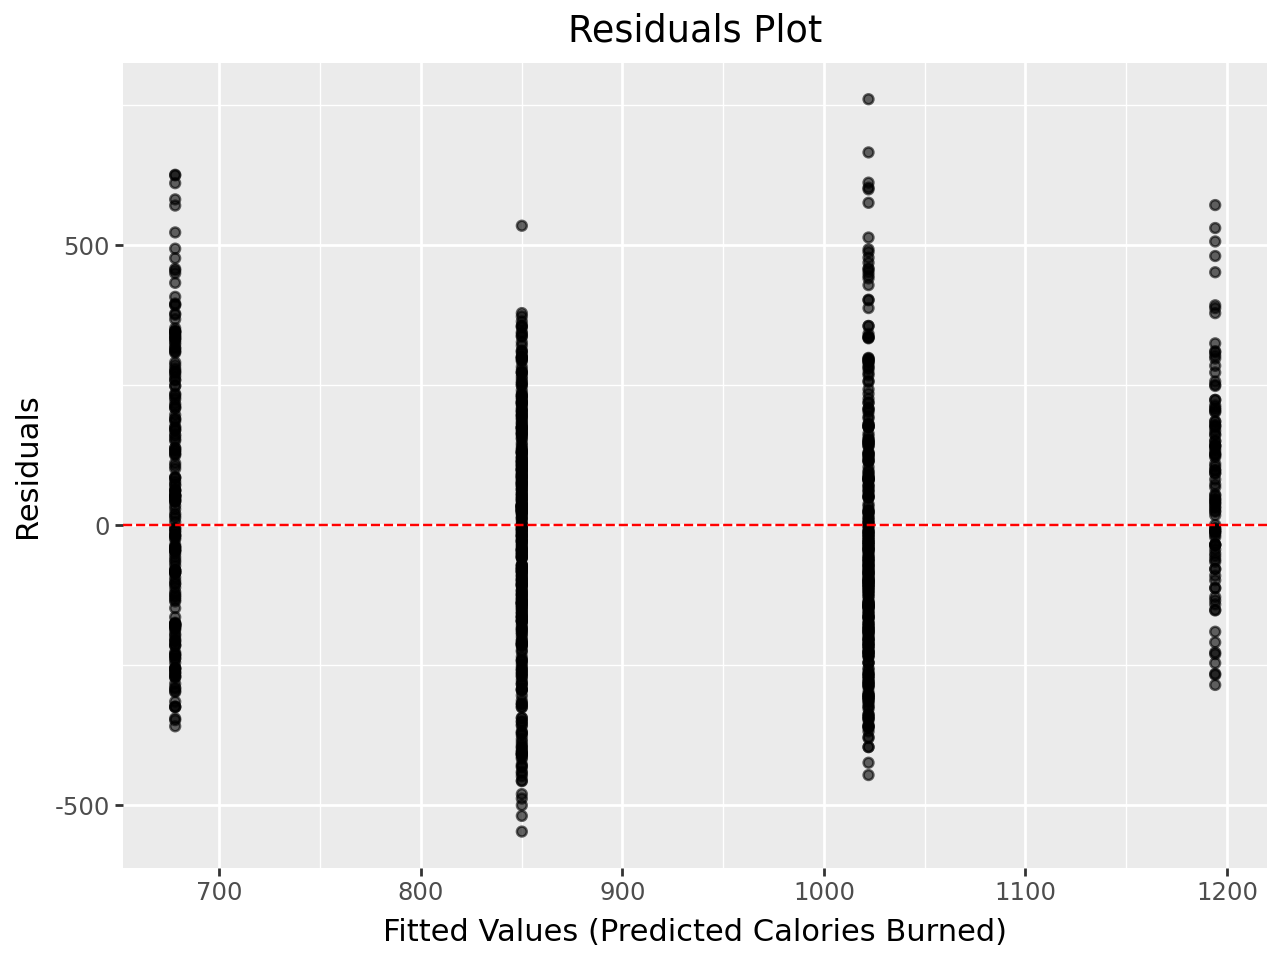

In [24]:
# Plot the residuals to check assumptions of linear regression
residuals_plot = (
    ggplot(df_analysis, aes(x=model.fittedvalues, y=model.resid))
    + geom_point(alpha=0.6)
    + geom_hline(yintercept=0, color='red', linetype='dashed')
    + labs(
        title="Residuals Plot",
        x="Fitted Values (Predicted Calories Burned)",
        y="Residuals"
    )
)
print(residuals_plot)

The model fit is indicated by an **R-squared value** of 0.332, which shows that approximately 33.2% of the variability in **Calories Burned** can be explained by **Workout Frequency**. While this suggests a moderate relationship, it also highlights that other factors not included in the model may contribute to calorie burn. The model's **F-statistic** (482.5) and its associated p-value (3.91e-87) confirm that the model is statistically significant, indicating that workout frequency is a significant predictor of calories burned. 

The coefficients further clarify the relationship: the **Intercept (333.95)** represents the predicted calories burned for someone who trains zero days per week—a hypothetical baseline for the model. The coefficient for **Workout Frequency (172.04)** reveals that for each additional training day per week, an individual is predicted to burn an additional 172.04 calories per session, on average. The p-value for this coefficient is less than 0.001, confirming its high statistical significance.

The residuals plot shows that residuals are generally evenly distributed around zero, meeting the linearity assumption. While a few outliers are present, they do not appear to significantly violate the model’s assumptions. Overall, the model demonstrates a clear positive relationship between workout frequency and calories burned, supporting the hypothesis that training more frequently can lead to better calorie burn, with an estimated increase of approximately 172 calories per additional training day.

# Conclusion

This analysis investigated whether workout frequency is associated with a higher amount of calories burned per session. 

1. **Correlation Analysis**:
   - A statistically significant moderate positive correlation (\( r = 0.58, p < 0.05 \)) was found between workout frequency and calories burned.

2. **Regression Analysis**:
   - Linear regression confirmed that workout frequency is a significant predictor of calories burned (\( p < 0.05 \)).
   - Each additional training day is associated with an increase of approximately **172 calories burned per session**.

The results demonstrate that increasing workout frequency is positively associated with calories burned per session. While other factors like workout intensity or type may also contribute, this finding highlights the importance of consistency in achieving fitness goals.
